<a href="https://colab.research.google.com/github/Igorgodoi/tccpucminas/blob/master/TCCMINAS_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Autor: Igor Reis de Godoi
# TCC PUCMINAS 2020 - Predição da duração de uma audiência trabalhista
# Quarta Parte: Criação de Modelos de Machine Learning

In [5]:
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import numpy as np
import pandas as pd
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [18]:
# Importando o dataset audiencias processada
drive.mount('/content/drive')
df_audiencia = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/audiencia_processada.csv', encoding='CP1252')
# Eliminando coluna municipio, pois é redundante com nome_municipio
df_audiencia=df_audiencia.drop(['municipio','Unnamed: 0'], axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Ajustando tipagem de colunas
colunas_categoricas = ['uf_municipio', 'nome_municipio', 'tipo_audiencia', 'vara_trabalho', 'classe_processual', 'juiz', 'sala_audiencia', 'atividade_economica', 'assunto', 'autor', 'reu']
for coluna in colunas_categoricas:
  df_audiencia[coluna] = df_audiencia[coluna].astype('category')
df_audiencia['minutos_do_dia'] = df_audiencia['minutos_do_dia'].astype('int64')
df_audiencia['dt_inicio_programada'] = df_audiencia['dt_inicio_programada'].astype('datetime64')

df_audiencia.head()

,uf_municipio,nome_municipio,populacao_estimada2019_municipio,tipo_audiencia,vara_trabalho,classe_processual,juiz,dt_inicio_programada,marcacao_automatica,hora_abertura,hora_encerramento,data_audiencia,dia_semana,sala_audiencia,apos_reforma_trabalhista,valor_causa,segredo_justica,justica_gratuita,tutela_liminar,prioridade,atividade_economica,assunto,autor,reu,duracao_audiencia,minutos_do_dia
0,RO,Cacoal,85359,Inquirição Testemunha,863,CartPrecCiv,64921,2018-04-09 14:00:00,Manual,14:15,14:20,04/09/2018,3,71,Apos Reforma,2000.00,Sem Segredo,Nao Gratuita,Sem tutela,Sem Prioridade,ATIVIDADE NÃO IDENTIFICADA,Objetos de Cartas Precatórias / de Ordem / Rog...,554672,863690,5,840
1,RO,Cacoal,85359,Inquirição Testemunha,1465,CartPrecCiv,174280,2018-11-20 14:50:00,Manual,14:05,14:10,20/11/2018,3,149,Apos Reforma,300000.00,Sem Segredo,Nao Gratuita,Sem tutela,Sem Prioridade,COMÉRCIO VAREJISTA,Objetos de Cartas Precatórias / de Ordem / Rog...,529280,47786,5,890
2,RO,Guajará-Mirim,46174,Una,659,ATOrd,195134,2019-02-18 14:10:00,Manual,14:38,14:53,18/02/2019,2,29,Apos Reforma,38203.21,Sem Segredo,Gratuita,Sem tutela,Sem Prioridade,ESPORTE E LAZER,"Remuneração, Verbas Indenizatórias e Benefícios",970398,970401,15,850
3,RO,Ji-Paraná,128969,Inquirição Testemunha,20,CartPrecCiv,7711,2019-08-07 09:00:00,Manual,09:10,09:18,08/07/2019,2,236,Apos Reforma,2000.00,Sem Segredo,Nao Gratuita,Sem tutela,Sem Prioridade,SAÚDE,Objetos de Cartas Precatórias / de Ordem / Rog...,1140000,1140002,8,540
4,RO,Porto Velho,529544,Conciliação em Execução,653,ETCiv,100086,2019-05-31 11:20:00,Manual,12:55,12:58,31/05/2019,6,165,Apos Reforma,2000.00,Sem Segredo,Nao Gratuita,Sem tutela,Sem Prioridade,COMÉRCIO VAREJISTA,Atos executórios,860039,253308,3,680


In [20]:
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [21]:
# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(df_audiencia.drop('duracao_audiencia',axis=1),df_audiencia['duracao_audiencia'],test_size=0.3)

In [22]:
print(X_train.shape, X_test.shape)

(184057, 25) (78882, 25)


In [ ]:
# Encoding atributos categóricos
!pip install category-encoders
from category_encoders.target_encoder import TargetEncoder

In [24]:
feature_list = list(X_train.columns)
feature_list

['uf_municipio',
 'nome_municipio',
 'populacao_estimada2019_municipio',
 'tipo_audiencia',
 'vara_trabalho',
 'classe_processual',
 'juiz',
 'dt_inicio_programada',
 'marcacao_automatica',
 'hora_abertura',
 'hora_encerramento',
 'data_audiencia',
 'dia_semana',
 'sala_audiencia',
 'apos_reforma_trabalhista',
 'valor_causa',
 'segredo_justica',
 'justica_gratuita',
 'tutela_liminar',
 'prioridade',
 'atividade_economica',
 'assunto',
 'autor',
 'reu',
 'minutos_do_dia']

In [25]:
te = TargetEncoder()
X_target_encoded = te.fit_transform(X_train, y_train)
X_target_encoded.sample(10)

,uf_municipio,nome_municipio,populacao_estimada2019_municipio,tipo_audiencia,vara_trabalho,classe_processual,juiz,dt_inicio_programada,marcacao_automatica,hora_abertura,hora_encerramento,data_audiencia,dia_semana,sala_audiencia,apos_reforma_trabalhista,valor_causa,segredo_justica,justica_gratuita,tutela_liminar,prioridade,atividade_economica,assunto,autor,reu,minutos_do_dia
34614,12.157348,10.062622,328454,4.822497,12.723839,9.743486,11.749451,2018-05-21 13:30:00,12.369688,8.955929,4.755307,11.931095,2,10.954598,10.550566,25600.59,12.141322,12.112906,12.244946,12.120088,11.871531,10.815542,12.181194,18.480777,810
261380,12.157348,4.293011,19414,23.102918,5.740171,13.108473,5.474339,2019-09-04 14:30:00,12.369688,15.427885,17.116228,14.238924,3,5.042553,10.550566,14191.94,12.141322,12.112906,12.244946,12.120088,12.740107,10.644597,7.662379,8.820513,870
138220,12.157348,12.868692,1933105,11.696720,12.187082,9.743486,13.592803,2019-04-07 10:40:00,12.369688,14.177596,16.855956,13.498721,5,14.521799,10.550566,13423.19,12.141322,12.112906,12.244946,12.120088,11.296890,10.681452,11.683201,14.615385,640
95038,12.157348,12.868692,1933105,23.102918,15.885880,13.108473,16.140523,2018-07-08 16:00:00,12.369688,11.448087,23.745455,11.827124,3,16.120353,14.149833,40000.00,12.141322,12.112906,12.244946,12.120088,13.646786,13.242638,12.181194,19.249998,960
139635,12.157348,12.868692,1933105,11.696720,15.885880,9.743486,16.140523,2019-09-20 14:30:00,12.369688,16.131092,16.439474,9.568182,6,16.120353,10.550566,30327.47,12.141322,12.112906,12.244946,12.120088,13.084469,10.794118,12.181194,17.012782,870
199818,12.157348,11.815523,423666,17.148825,13.728628,17.078129,14.140368,2018-12-07 16:45:00,12.369688,14.847619,23.040541,13.375000,5,13.499260,10.550566,36000.00,12.141322,12.519626,12.244946,12.120088,10.929252,17.103222,12.181194,12.181194,1005
33986,12.157348,10.062622,328454,15.367579,6.559745,9.743486,6.546620,2019-04-06 13:30:00,12.369688,9.772189,5.181390,13.851718,3,6.546620,10.550566,6709.21,12.141322,12.112906,12.244946,12.120088,10.840305,13.588466,12.181194,12.181194,810
82833,12.157348,12.868692,1933105,23.102918,11.937133,13.108473,13.341577,2018-01-31 10:00:00,12.369688,9.647510,14.881967,10.159483,4,12.989818,14.149833,36000.00,12.141322,12.112906,12.244946,12.120088,13.084469,12.543107,12.181194,23.591022,600
120751,12.157348,12.868692,1933105,2.516900,12.656903,9.743486,12.801361,2018-01-24 10:05:00,12.369688,12.218225,11.402878,9.523121,4,13.235220,14.149833,6300.00,12.141322,12.112906,12.244946,12.120088,10.840305,6.848554,12.181194,11.558824,605
242866,12.157348,7.166667,9849,23.102918,10.693303,13.108473,12.377649,2018-07-06 15:00:00,12.369688,15.477723,18.695550,11.500843,5,12.379460,14.149833,40000.00,12.141322,12.112906,12.244946,12.120088,10.840305,10.644597,12.181194,9.636479,900


In [29]:

X_target_encoded=X_target_encoded.drop(['dt_inicio_programada'], axis=1)
X_target_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184057 entries, 175869 to 126951
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   uf_municipio                      184057 non-null  float64
 1   nome_municipio                    184057 non-null  float64
 2   populacao_estimada2019_municipio  184057 non-null  int64  
 3   tipo_audiencia                    184057 non-null  float64
 4   vara_trabalho                     184057 non-null  float64
 5   classe_processual                 184057 non-null  float64
 6   juiz                              184057 non-null  float64
 7   marcacao_automatica               184057 non-null  float64
 8   hora_abertura                     184057 non-null  float64
 9   hora_encerramento                 184057 non-null  float64
 10  data_audiencia                    184057 non-null  float64
 11  dia_semana                        184057 non-nu

In [30]:
regressor = DecisionTreeRegressor()
regressor.fit(X_target_encoded, y_train)
regressor.feature_importances_ 

array([6.57899692e-04, 8.62465366e-03, 8.68455233e-03, 2.46446751e-01,
       1.36927622e-02, 8.83483885e-03, 1.65295297e-02, 2.37241546e-04,
       9.60115801e-02, 1.16340416e-01, 2.35857615e-02, 6.65841231e-03,
       1.41208974e-02, 2.45295224e-03, 1.96408526e-02, 3.80277492e-04,
       1.55842863e-03, 1.55358188e-03, 9.93308134e-04, 1.48755960e-02,
       1.67209392e-02, 2.48909881e-01, 8.49102938e-02, 4.75785932e-02])

In [38]:
regressor.score

<bound method RegressorMixin.score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')>

In [32]:
list(zip(X_target_encoded.columns, regressor.feature_importances_))

[('uf_municipio', 0.0006578996924735745),
 ('nome_municipio', 0.008624653660865558),
 ('populacao_estimada2019_municipio', 0.008684552329134022),
 ('tipo_audiencia', 0.2464467505339579),
 ('vara_trabalho', 0.013692762215971365),
 ('classe_processual', 0.008834838846478205),
 ('juiz', 0.016529529705435128),
 ('marcacao_automatica', 0.00023724154571320763),
 ('hora_abertura', 0.0960115800978583),
 ('hora_encerramento', 0.11634041635280572),
 ('data_audiencia', 0.02358576145395333),
 ('dia_semana', 0.006658412312416503),
 ('sala_audiencia', 0.014120897407483365),
 ('apos_reforma_trabalhista', 0.0024529522351022792),
 ('valor_causa', 0.019640852624550016),
 ('segredo_justica', 0.00038027749155647585),
 ('justica_gratuita', 0.0015584286301431156),
 ('tutela_liminar', 0.0015535818785005924),
 ('prioridade', 0.0009933081337888216),
 ('atividade_economica', 0.014875595965759571),
 ('assunto', 0.01672093923234951),
 ('autor', 0.24890988072514414),
 ('reu', 0.08491029375233197),
 ('minutos_do_di

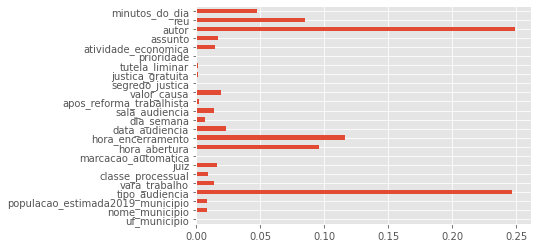

In [34]:
feat_importances = pd.Series(regressor.feature_importances_, index=X_target_encoded.columns)
feat_importances.plot(kind='barh')